In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist




In [77]:
# I used this function to called the dataframe and drop the null or missing values
def get_df():
   
   customer_df = pd.read_csv("data.csv", encoding_errors='ignore', delimiter = ',', on_bad_lines='skip' )
   filtered_customer_df =customer_df.dropna()


   return filtered_customer_df

customer_df = get_df()

In [78]:
get_df()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [79]:
customer_df['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: count, Length: 22190, dtype: int64

In [80]:
# I used label encoder for  my preprocessing method because my data would have one random letter 
# within a group of letters 
def cleaning_data(customer_df):
    class_labels = LabelEncoder()
    customer_df['Description'] = class_labels.fit_transform(customer_df['Description'].values)
    customer_df['Country'] = class_labels.fit_transform(customer_df['Country'].values)
    customer_df['InvoiceNo'] = class_labels.fit_transform(customer_df['Country'].values)
    customer_df['StockCode'] = class_labels.fit_transform(customer_df['Country'].values)
    customer_df['InvoiceDate'] = class_labels.fit_transform(customer_df['Country'].values)


    return customer_df

In [81]:
cleaning_data(customer_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,35,35,3716,6,35,2.55,17850.0,35
1,35,35,3724,6,35,3.39,17850.0,35
2,35,35,861,8,35,2.75,17850.0,35
3,35,35,1813,6,35,3.39,17850.0,35
4,35,35,2776,6,35,3.39,17850.0,35
...,...,...,...,...,...,...,...,...
541904,13,13,2263,12,13,0.85,12680.0,13
541905,13,13,695,6,13,2.10,12680.0,13
541906,13,13,701,4,13,4.15,12680.0,13
541907,13,13,700,4,13,4.15,12680.0,13


In [82]:
# For the next functions I was using Kmeans. I looked at the customer ids
# and use that as well as quantity and country to plt. The issue I had when
#working with these functions is the runtime. It would take roughly 25 minutes
# longer to get my code to execute because my data is so massive. There is propbably
#another easier way to do this. On top of that, when my code would run, the visual wasn't
#clear to me since theres alot of data so I really couldn't tell what was going on.
def cluster_mthd(customer_df):

    X = customer_df.drop('CustomerID',axis =1)
    y = customer_df["CustomerID"]
   
    plt.scatter(X['Quantity'],X['Country'])
    for  i, txt in enumerate(y): 
        plt.annotate(txt, (X['Quantity'][i],X['Country'][i]))

    plt.xlabel('Quantity')
    plt.ylabel('Country')
    plt.show()

  

In [83]:
def inert_distortion(customer_df):
    X = customer_df.drop('CustomerID',axis =1)
    y = customer_df["CustomerID"]
    
    inertias = []
    distortions = []

    for k in range(1,10):
        model = KMeans(n_clusters=k).fit(X)
        distance = cdist(X, model.cluster_centers_,
                                  'euclidean')
        distortion = sum(np.min(distance,axis =1))/X.shape[0]
        distortions.append(distortion)
        inertia = model.inertia_
        inertias.append(inertia)
    
    plt.plot(range(1,10),distortions)
    plt.title('Elbow Method with Distortion')

    plt.plot(range(1,10),inertias)
    plt.title('Elbow Method with Inertia')

In [84]:
# I used heirarchical cluster in this function. It was a lot easier for 
# me to see what was going on visually when using this. The number of clusters is 3.
# Better approach overall.
def clustering(customer_df):
    X = customer_df.drop('CustomerID',axis =1)
    y = customer_df["CustomerID"]
    
    linked = linkage(X,'ward')
    plt.figure(figsize=(10,7))
    dendro = dendrogram(linked,labels= list(y))

    cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
    cluster.fit_predict(X)

    plt.figure(figsize = (10,10))
    plt.scatter(X['Quantity'],X['Country'], c=cluster.labels_)
   
    for i, txt in enumerate(y):
        plt.annotate(txt, (X['UrbanPop'][i],X['Murder'][i]))

    plt.ylabel('Country')
    plt.xlabel('Quantity')
    plt.show()

    dendro
   

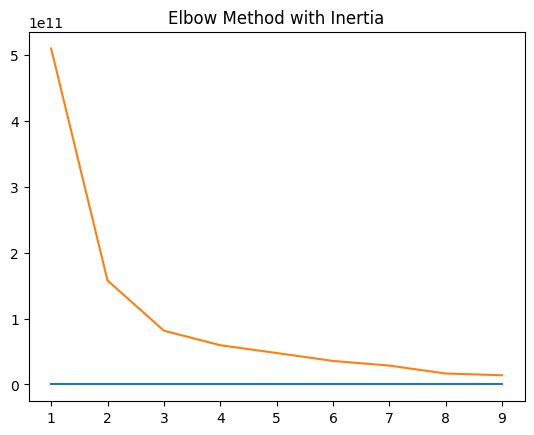

In [85]:
inert_distortion(customer_df)